In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [7]:
%matplotlib inline

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [9]:
data = pd.read_excel("data.xlsx")

In [10]:
data.head()

,Life Expectancy,Accidental Deaths,Alzheimer's,Assault,Cerebrovascular Diseases,Chronic Liver,Chronic Lower Respiratory,Diabetes,Heart Diseases,Hypertension,Parkinson's,Suicide
0,76.7,97860,44536,16889,167366,26259,124181,68399,725192,19638,14593,29199
1,76.8,97900,49558,16765,167661,26552,122009,69301,710760,18073,15682,29350
2,77.0,101537,53832,20308,163538,27035,123013,71372,700142,19250,16544,30622
3,77.0,106742,58866,17638,162672,27257,124816,73249,696947,20261,16959,31655
4,77.6,109277,63457,17732,157689,27503,126382,74219,685089,21940,17997,31484


In [29]:
dt = data.ix[:,(7,8)].values
dt_names = ['Diabetes', 'Heart Diseases'] 

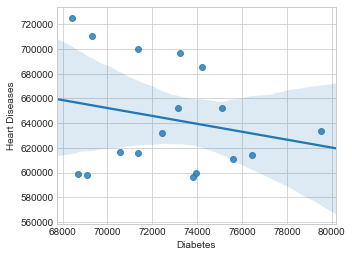

In [30]:
sb.regplot(x='Diabetes', y='Heart Diseases', data = data, scatter = True)

In [31]:
Diabetes = data['Diabetes']
Heart_Diseases = data['Heart Diseases']
spearmanr_coefficient, p_value = spearmanr(Diabetes, Heart_Diseases)

print(spearmanr_coefficient)

-0.1519607843137255


In [32]:
data.isnull().sum()

Life Expectancy                 0
Accidental Deaths               0
Alzheimer's                     0
Assault                         0
Cerebrovascular Diseases        0
Chronic Liver                   0
Chronic Lower Respiratory       0
Diabetes                        0
Heart Diseases                  0
Hypertension                    0
Parkinson's                     0
Suicide                         0
Heart_Diseases_Effectiveness    0
dtype: int64

In [33]:
def check(x):
    if x > 650000:
        return 1
    else:
        return 0
    
data['Heart_Diseases_Effectiveness'] = data['Heart Diseases'].apply(check)

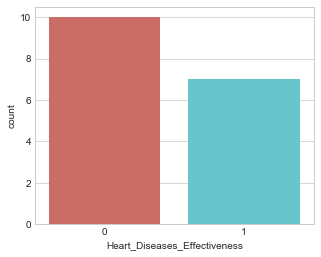

In [34]:
sb.countplot(x='Heart_Diseases_Effectiveness', data = data, palette = 'hls')

In [21]:
data.info() #smalldataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
Life Expectancy                 17 non-null float64
Accidental Deaths               17 non-null int64
Alzheimer's                     17 non-null int64
Assault                         17 non-null int64
Cerebrovascular Diseases        17 non-null int64
Chronic Liver                   17 non-null int64
Chronic Lower Respiratory       17 non-null int64
Diabetes                        17 non-null int64
Heart Diseases                  17 non-null int64
Hypertension                    17 non-null int64
Parkinson's                     17 non-null int64
Suicide                         17 non-null int64
Heart_Diseases_Effectiveness    17 non-null int64
dtypes: float64(1), int64(12)
memory usage: 1.8 KB


In [22]:
X = scale(dt)

C:\Users\Ege\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [49]:
lr = LogisticRegression()

lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
lr.score(X,Y)

0.29411764705882354

In [45]:
Y = data.ix[:, 12].values

In [46]:
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr.score(X,Y)

1.0

In [48]:
Y_pred = lr.predict(X)
from sklearn.metrics import classification_report

print(classification_report(Y, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00        17

